# Here we predict the restaurants food cost

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [87]:
ds=pd.read_excel("Data_Train.xlsx")
ds

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [88]:
ds.shape

(12690, 9)

Observation:
    
    There are 12690 rows and 9 columns present in our dataset.

In [89]:
ds.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

Features:
    
    TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

    RESTAURANT_ID: A unique ID for each restaurant.

    CUISINES: The variety of cuisines that the restaurant offers.

    TIME: The open hours of the restaurant.

    CITY: The city in which the restaurant is located.

    LOCALITY: The locality of the restaurant.

    RATING: The average rating of the restaurant by customers.

    VOTES: The overall votes received by the restaurant.

    COST: The average cost of a two-person meal.

In [90]:
ds.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

Observation:
    
    RESTAURANT_ID and cost is i int data type rest other columns are categorical data types.

## Checking missing values

In [91]:
ds.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

Observation:
    
    There are 112 missing values in CITY, 98 in LOCALITY, 2 in RATING, 1204 in VOTES column.
    
we can also see this via visualization with the help of heatmap.

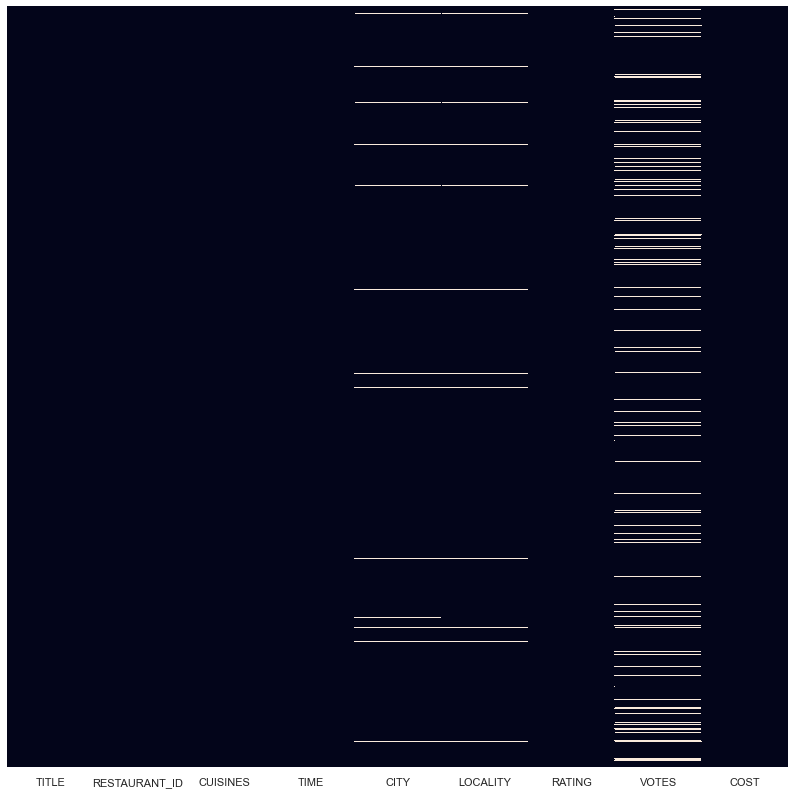

In [92]:
plt.figure(figsize=(14,14))
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False)

## Exploring Categorical Columns

In [93]:
for column in ds.columns:
    if ds[column].dtypes == object:
        print(str(column) + ' : ' + str(ds[column].unique()))
        print(ds[column].value_counts())
        print('*******************************************************************************************************')
        print('\n')

TITLE : ['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' '

Observation:
    
    There are more missing values present in Rating column encoded as NEW, nan, -

## Imputing missing values

In [94]:
#Filling the null values in categorical column Locality, City  with most_frequent strategy
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')

list1=['CITY','LOCALITY']
for val in list1:
    ds[val]=imputer.fit_transform(ds[val].values.reshape(-1,1))

In [95]:
ds.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              2
VOTES            1204
COST                0
dtype: int64

In [96]:
ds.replace({'RATING':{'NEW':np.nan}},regex=False,inplace=True)

In [97]:
ds.replace({'RATING':{'-':np.nan}},regex=False,inplace=True)

In [98]:
ds.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING           1204
VOTES            1204
COST                0
dtype: int64

In [99]:
ds = ds.assign(VOTES = lambda x: x['VOTES'].str.extract('(\d+)'))

In [100]:
ds.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300


In [101]:
#changing the data types of Rating and Votes
data_types_dict = {'RATING':float, 'VOTES':float}
ds = ds.astype(data_types_dict)

In [102]:
ds.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
COST               int64
dtype: object

In [103]:
#Filling the null values in Rating column with Random Sample Imputation

def impute_nan(ds,variable,median):
    ds[variable+"_median"]=ds[variable].fillna(median)
    ds[variable+"_random"]=ds[variable]
    random_sample=ds[variable].dropna().sample(ds[variable].isnull().sum(),random_state=0,replace=True)
    random_sample.index=ds[ds[variable].isnull()].index
    ds.loc[ds[variable].isnull()].index
    ds.loc[ds[variable].isnull(),variable+'_random']=random_sample

In [104]:
median=ds.RATING.median()

In [105]:
median

3.8

In [106]:
impute_nan(ds,"RATING",median)

In [107]:
ds.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,RATING_median,RATING_random
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,3.6,3.6
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,4.2,4.2
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,3.8,3.8
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,4.1,4.1
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,3.8,3.8


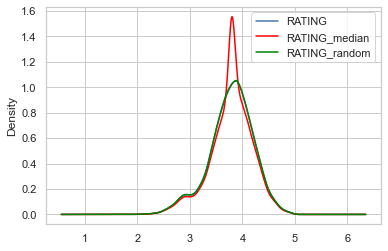

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111)
ds['RATING'].plot(kind='kde', ax=ax)
ds.RATING_median.plot(kind='kde', ax=ax, color='red')
ds.RATING_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [109]:
#Filling the null values in VOTES column with Random Sample Imputation

def impute_nan(ds,variable,median):
    ds[variable+"_median"]=ds[variable].fillna(median)
    ds[variable+"_random"]=ds[variable]
    random_sample=ds[variable].dropna().sample(ds[variable].isnull().sum(),random_state=0,replace=True)
    random_sample.index=ds[ds[variable].isnull()].index
    ds.loc[ds[variable].isnull()].index
    ds.loc[ds[variable].isnull(),variable+'_random']=random_sample

In [110]:
median1=ds.VOTES.median()

In [111]:
median1

163.0

In [112]:
impute_nan(ds,"VOTES",median1)

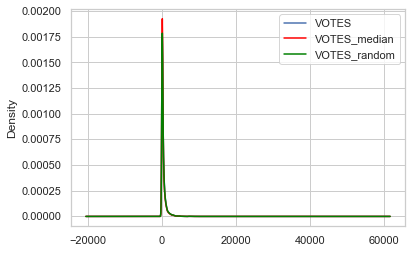

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)
ds['VOTES'].plot(kind='kde', ax=ax)
ds.VOTES_median.plot(kind='kde', ax=ax, color='red')
ds.VOTES_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [114]:
ds.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING           1204
VOTES            1204
COST                0
RATING_median       0
RATING_random       0
VOTES_median        0
VOTES_random        0
dtype: int64

## dropping the unnecessary columns

In [115]:
ds.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,RATING_median,RATING_random,VOTES_median,VOTES_random
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,3.6,3.6,49.0,49.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,4.2,4.2,30.0,30.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,3.8,3.8,221.0,221.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,4.1,4.1,24.0,24.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,3.8,3.8,165.0,165.0


In [116]:
ds.drop(['RATING','VOTES','RATING_median','VOTES_median','RESTAURANT_ID'],axis=1,inplace=True)

In [117]:
ds.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,COST,RATING_random,VOTES_random
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,1200,3.6,49.0
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,1500,4.2,30.0
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,800,3.8,221.0
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,800,4.1,24.0
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,300,3.8,165.0


## Encoding categorical variables

In [118]:
from collections import Counter
Counter(ds['CITY'])

Counter({'Thane': 97,
         'Chennai': 2286,
         'Mumbai': 1722,
         'Bangalore': 2149,
         'Gurgaon': 379,
         'Hyderabad': 1819,
         'Kochi': 1279,
         'Thane West': 52,
         'Andheri Lokhandwala': 1,
         'New Delhi': 1321,
         'Andheri West': 48,
         'Malad East': 1,
         '682036': 1,
         'Bangalor': 1,
         'Navi Mumbai': 165,
         'Bandra West': 69,
         'Delhi': 8,
         'Noida': 211,
         'Bangalore-560066': 1,
         'Secunderabad': 310,
         'India': 23,
         'Madhuranagar': 1,
         'Chennai Teynampet': 3,
         'Faridabad': 79,
         'Chembur.': 1,
         'Maharashtra': 5,
         'opp gurudwara Shakurpur': 1,
         'Telagana Land Line:040-48507016': 1,
         'Ghaziabad': 102,
         'Karnataka': 2,
         'Kerala': 10,
         'Edappally': 7,
         'Kadavanthra': 1,
         'Ernakulam Circle kochi': 1,
         'Bengalore': 6,
         'Near Reliance Fresh': 

In [119]:
#Encoding categorical columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['CITY','LOCALITY','TITLE','CUISINES','TIME']
for val in list1:
    ds[val]=le.fit_transform(ds[val].astype(str))

In [120]:
ds.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,COST,RATING_random,VOTES_random
0,31,2627,739,320,285,1200,3.6,49.0
1,33,289,1885,67,1046,1500,4.2,30.0
2,31,2976,661,67,1101,800,3.8,221.0
3,95,4130,275,222,136,800,4.1,24.0
4,50,1766,615,222,620,300,3.8,165.0


## Summary statistics

In [121]:
ds.describe()

,TITLE,CUISINES,TIME,CITY,LOCALITY,COST,RATING_random,VOTES_random
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,59.465721,2235.193932,1180.084003,142.281403,652.391568,655.252246,3.785753,414.207171
std,32.762427,1204.091664,754.459944,83.921428,399.116379,627.003540,0.422852,832.611428
min,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,4.000000
25%,31.000000,1185.250000,555.000000,67.000000,337.000000,300.000000,3.600000,57.000000
50%,59.000000,2416.500000,1123.000000,131.000000,582.000000,500.000000,3.800000,163.000000
75%,95.000000,3222.750000,1847.000000,222.000000,1009.000000,800.000000,4.100000,452.000000
max,112.000000,4154.000000,2688.000000,358.000000,1415.000000,14000.000000,4.900000,41186.000000


Observation:
    
    1. The maximum cost of a restaurant is 14000.
    
    2. The minimum cost of a restaurant is 20.
    
    3. Maximum standard deviation is present in CUISINES column.

## To check the correlation

In [122]:
ds_cor=ds.corr()
ds_cor

,TITLE,CUISINES,TIME,CITY,LOCALITY,COST,RATING_random,VOTES_random
TITLE,1.000000,0.244866,0.053914,-0.016281,0.026614,-0.263581,-0.140990,-0.120253
CUISINES,0.244866,1.000000,0.104741,0.023931,0.016504,-0.014078,-0.054020,-0.033321
TIME,0.053914,0.104741,1.000000,-0.011372,-0.008062,0.018248,0.044428,-0.012979
CITY,-0.016281,0.023931,-0.011372,1.000000,0.043072,0.044555,0.051712,0.049829
LOCALITY,0.026614,0.016504,-0.008062,0.043072,1.000000,-0.015050,-0.023612,-0.028810
COST,-0.263581,-0.014078,0.018248,0.044555,-0.015050,1.000000,0.302504,0.230526
RATING_random,-0.140990,-0.054020,0.044428,0.051712,-0.023612,0.302504,1.000000,0.353953
VOTES_random,-0.120253,-0.033321,-0.012979,0.049829,-0.028810,0.230526,0.353953,1.000000


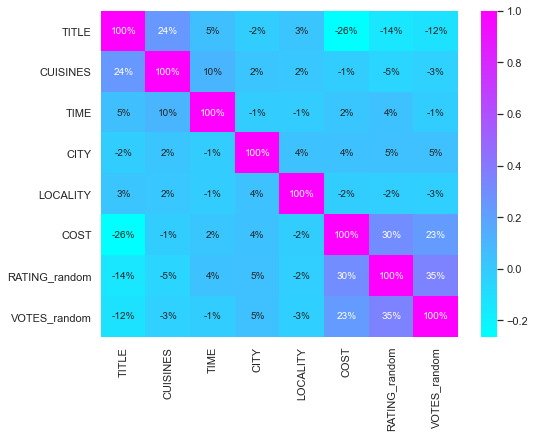

In [123]:
plt.figure(figsize=(8,6))
sns.heatmap(ds_cor,annot=True,fmt='.0%',cmap='cool')
plt.show()

Observation:
    
    1. Cost is positively correlated with Rating_random and Votes_random.
    
    2. Cost is negatively correlated with Title.
    
    3. Rating_random is positively correlated with votes_random.

Text(0.5, 1.0, 'correaltion with target variable COST')

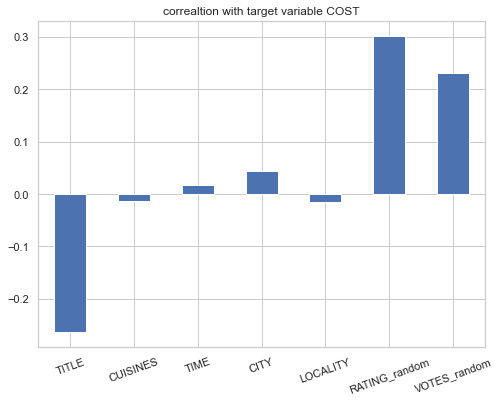

In [124]:
#checking the correlation with target variable 'Cost'

plt.figure(figsize=(8,6))
ds.drop('COST', axis=1).corrwith(ds['COST']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correaltion with target variable COST")

Observation:
    
    Cost is positively correlated with rating_random and votes_random.
    
    cost is negatively correlated with Title

# Data Visualization

## Univariate Analysis

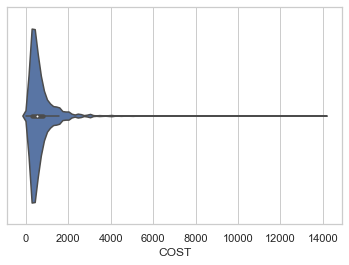

300      1595
400      1357
500      1300
200      1031
600       806
         ... 
4100        1
70          1
14000       1
1950        1
80          1
Name: COST, Length: 86, dtype: int64

In [125]:
#checking the Cost

sns.set(style='whitegrid')
sns.violinplot(ds['COST'])
plt.show()

ds['COST'].value_counts()

Observation:
    
    1. Cost at maximum restaurants falls in the range of 200 to 1000.
    
    2. maximum cost at a restaurant observed is 14000.

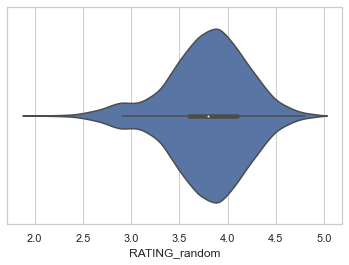

3.9    1377
3.8    1304
3.7    1228
4.0    1212
3.6    1046
4.1    1028
3.5     854
4.2     798
3.4     625
4.3     608
4.4     401
3.3     388
3.2     293
4.5     230
2.9     211
3.1     201
3.0     187
2.8     165
4.6     151
2.7     101
4.7      79
2.6      69
4.8      38
2.5      37
4.9      23
2.4      16
2.3      10
2.2       5
2.1       3
2.0       2
Name: RATING_random, dtype: int64

In [126]:
#checking the RATING_random

sns.set(style='whitegrid')
sns.violinplot(ds['RATING_random'])
plt.show()

ds['RATING_random'].value_counts()

Observation:
    
    1. Rating at maximum restaurants falls in the range of 3.7 to 4.2.

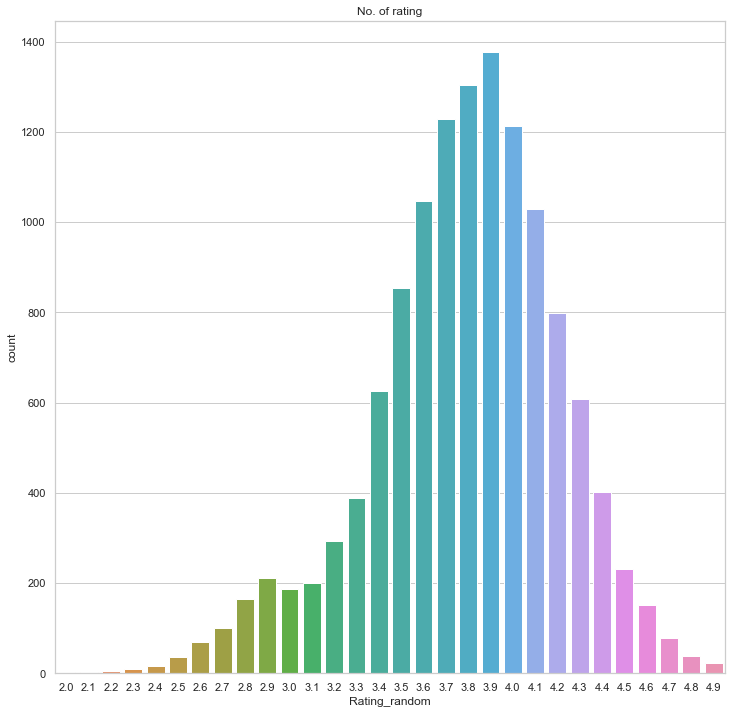

In [127]:
#Checking the RATING_random

plt.subplots(figsize=(12,12))
sns.countplot(x="RATING_random", data=ds)
plt.title("No. of rating")
plt.xlabel('Rating_random')
plt.ylabel("count")
plt.show()

Observation:
    
    Maximum restaurants are with rating 3.9.
    
    Maximum rating observed is 4.9.

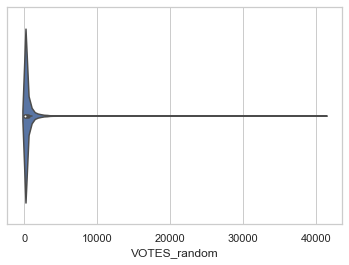

44.0      77
28.0      76
29.0      74
38.0      73
26.0      71
          ..
3357.0     1
3508.0     1
1374.0     1
2375.0     1
9300.0     1
Name: VOTES_random, Length: 1847, dtype: int64

In [128]:
#checking the VOTES_random

sns.set(style='whitegrid')
sns.violinplot(ds['VOTES_random'])
plt.show()

ds['VOTES_random'].value_counts()

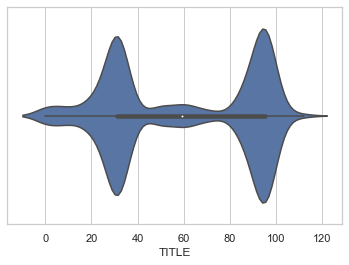

95    4218
31    3652
87    1003
22     607
50     382
      ... 
18       1
14       1
37       1
49       1
85       1
Name: TITLE, Length: 113, dtype: int64

In [129]:
#checking the TITLE

sns.set(style='whitegrid')
sns.violinplot(ds['TITLE'])
plt.show()

ds['TITLE'].value_counts()

osbervation:
    
    Maximum number of Title falls in the range of 30 to 95.

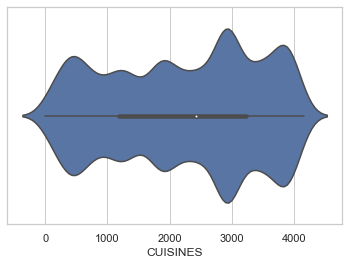

3801    532
2850    526
2946    501
1893    286
1095    167
       ... 
4077      1
4069      1
2020      1
4061      1
0         1
Name: CUISINES, Length: 4155, dtype: int64

In [130]:
#checking the CUISINES

sns.set(style='whitegrid')
sns.violinplot(ds['CUISINES'])
plt.show()

ds['CUISINES'].value_counts()

Observation:
    
    Maximum number of cuisines falls in the range of 1200 to 3300.

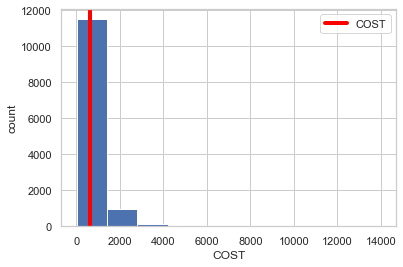

In [131]:
#checking the mean of COST

red_shift = ds['COST'].hist()
mean_val = np.mean(ds['COST'])
plt.axvline(mean_val,linewidth=4, color='red', label='COST')
plt.xlabel('COST')
plt.ylabel('count')
plt.legend()
plt.show()

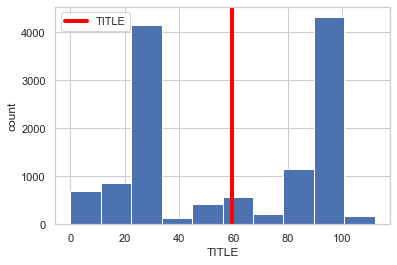

In [132]:
#checking the mean of TITLE

red_shift = ds['TITLE'].hist()
mean_val = np.mean(ds['TITLE'])
plt.axvline(mean_val,linewidth=4, color='red', label='TITLE')
plt.xlabel('TITLE')
plt.ylabel('count')
plt.legend()
plt.show()

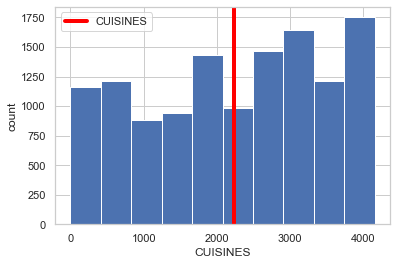

In [133]:
#checking the mean of CUISINES

red_shift = ds['CUISINES'].hist()
mean_val = np.mean(ds['CUISINES'])
plt.axvline(mean_val,linewidth=4, color='red', label='CUISINES')
plt.xlabel('CUISINES')
plt.ylabel('count')
plt.legend()
plt.show()

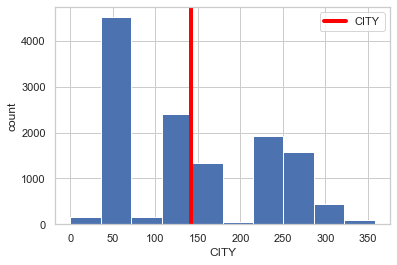

In [134]:
#checking the mean of CITY

red_shift = ds['CITY'].hist()
mean_val = np.mean(ds['CITY'])
plt.axvline(mean_val,linewidth=4, color='red', label='CITY')
plt.xlabel('CITY')
plt.ylabel('count')
plt.legend()
plt.show()

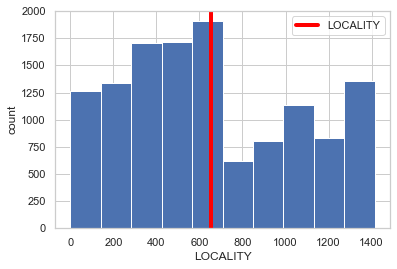

In [135]:
#checking the mean of LOCALITY

red_shift = ds['LOCALITY'].hist()
mean_val = np.mean(ds['LOCALITY'])
plt.axvline(mean_val,linewidth=4, color='red', label='LOCALITY')
plt.xlabel('LOCALITY')
plt.ylabel('count')
plt.legend()
plt.show()

## Bivaraite Analysis

<Figure size 576x288 with 0 Axes>

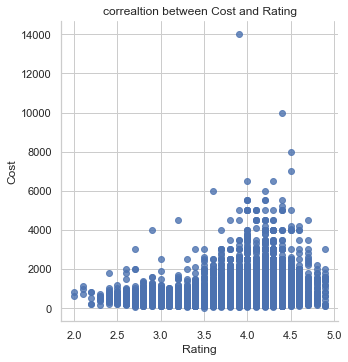

In [136]:
#scatter plot between Cost and Rating
plt.figure(figsize=(8,4))
sns.lmplot(x='RATING_random',y='COST',fit_reg=False,data=ds)
plt.xlabel('Rating')
plt.title('correaltion between Cost and Rating')
plt.ylabel('Cost')
plt.show()

Observation:
    
    As the rating increases cost increases.

<Figure size 576x288 with 0 Axes>

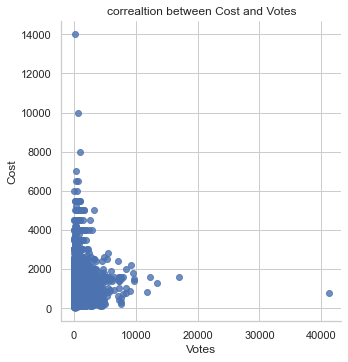

In [137]:
#scatter plot between Cost and Votes
plt.figure(figsize=(8,4))
sns.lmplot(x='VOTES_random',y='COST',fit_reg=False,data=ds)
plt.xlabel('Votes')
plt.title('correaltion between Cost and Votes')
plt.ylabel('Cost')
plt.show()

<Figure size 576x288 with 0 Axes>

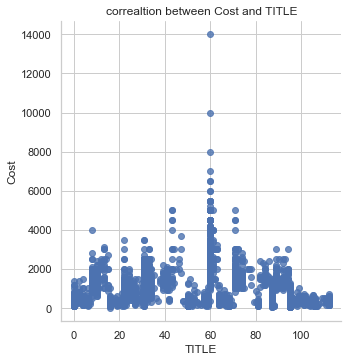

In [138]:
#scatter plot between Cost and Title
plt.figure(figsize=(8,4))
sns.lmplot(x='TITLE',y='COST',fit_reg=False,data=ds)
plt.xlabel('TITLE')
plt.title('correaltion between Cost and TITLE')
plt.ylabel('Cost')
plt.show()

<Figure size 576x288 with 0 Axes>

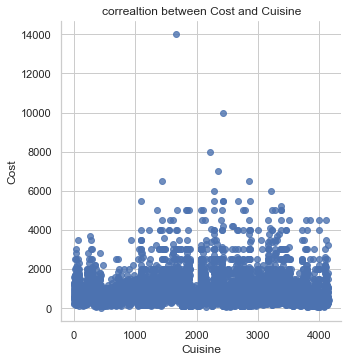

In [139]:
#scatter plot between Cost and cuisine
plt.figure(figsize=(8,4))
sns.lmplot(x='CUISINES',y='COST',fit_reg=False,data=ds)
plt.xlabel('Cuisine')
plt.title('correaltion between Cost and Cuisine')
plt.ylabel('Cost')
plt.show()

<Figure size 576x288 with 0 Axes>

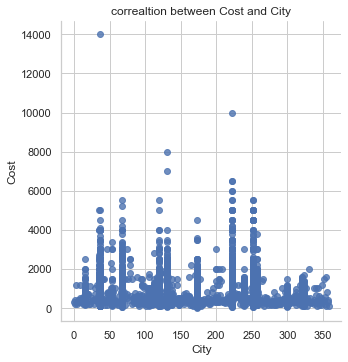

In [140]:
#scatter plot between Cost and cuisine
plt.figure(figsize=(8,4))
sns.lmplot(x='CITY',y='COST',fit_reg=False,data=ds)
plt.xlabel('City')
plt.title('correaltion between Cost and City')
plt.ylabel('Cost')
plt.show()

<Figure size 576x288 with 0 Axes>

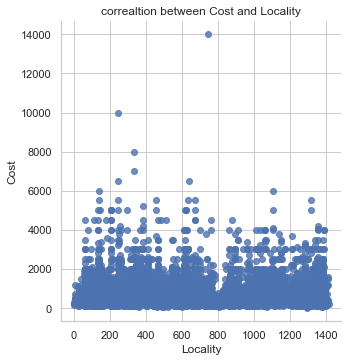

In [141]:
#scatter plot between Cost and Locality
plt.figure(figsize=(8,4))
sns.lmplot(x='LOCALITY',y='COST',fit_reg=False,data=ds)
plt.xlabel('Locality')
plt.title('correaltion between Cost and Locality')
plt.ylabel('Cost')
plt.show()

<Figure size 576x288 with 0 Axes>

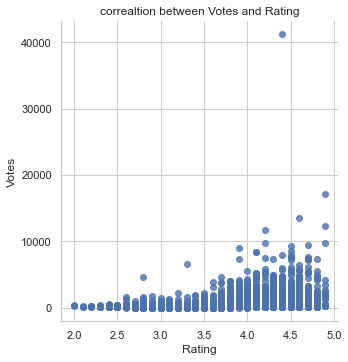

In [142]:
#scatter plot between Votes and Rating
plt.figure(figsize=(8,4))
sns.lmplot(x='RATING_random',y='VOTES_random',fit_reg=False,data=ds)
plt.xlabel('Rating')
plt.title('correaltion between Votes and Rating')
plt.ylabel('Votes')
plt.show()

observation:
    
    As the rating increases number of votes increases.

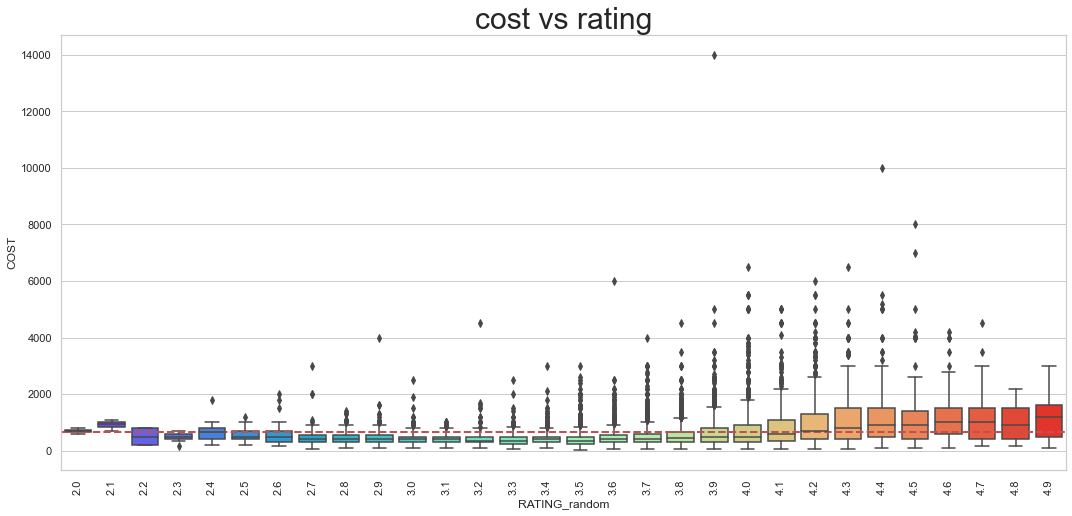

In [143]:
#Rating vs cost

plt.figure(figsize=(18,8))
mean_price=np.mean(ds['COST'])
sns.boxplot(y='COST',x='RATING_random',data=ds,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("cost vs rating",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

## Mutlivariate Analysis

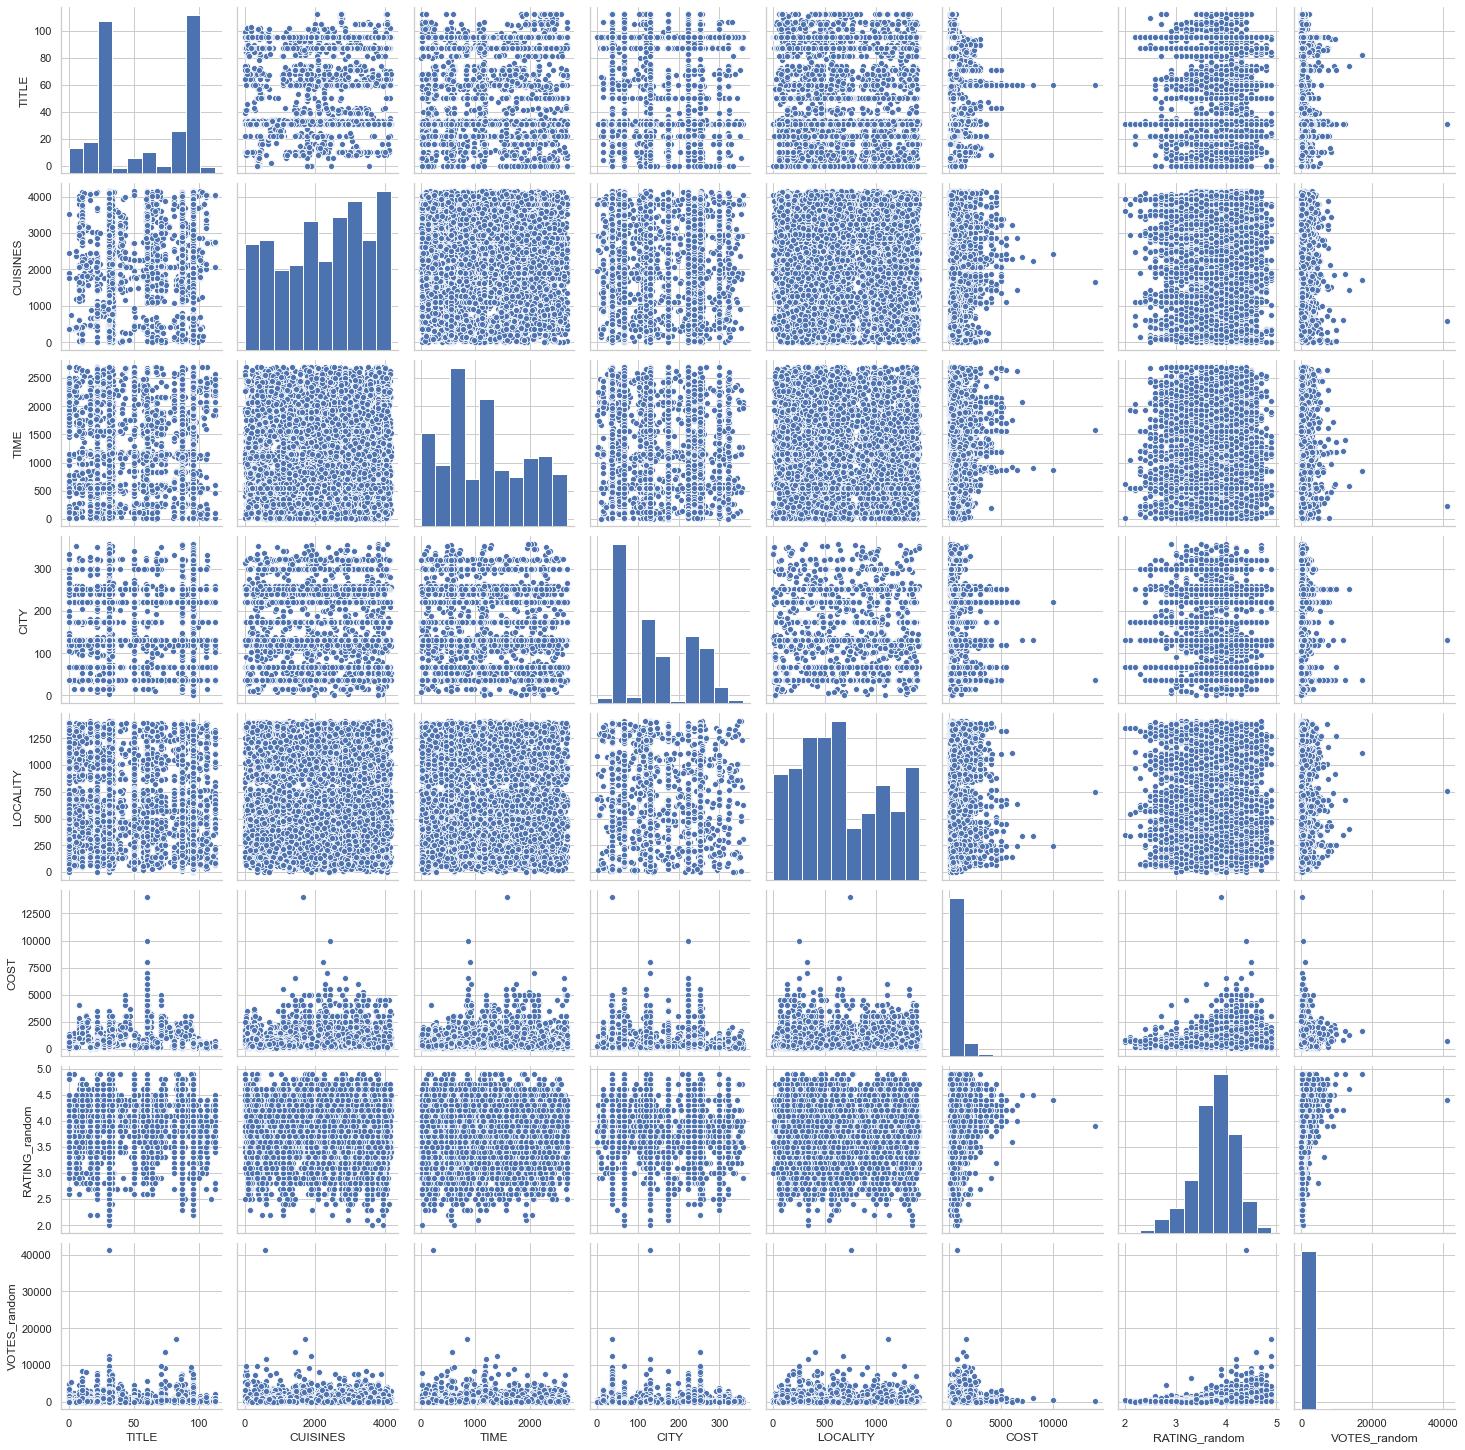

In [144]:
sns.pairplot(ds)

### dropping unnecessary columns

In [146]:
ds.drop(['TIME','CITY','LOCALITY'],axis=1,inplace=True)

In [147]:
ds.head()

,TITLE,CUISINES,COST,RATING_random,VOTES_random
0,31,2627,1200,3.6,49.0
1,33,289,1500,4.2,30.0
2,31,2976,800,3.8,221.0
3,95,4130,800,4.1,24.0
4,50,1766,300,3.8,165.0


# Removing outliers

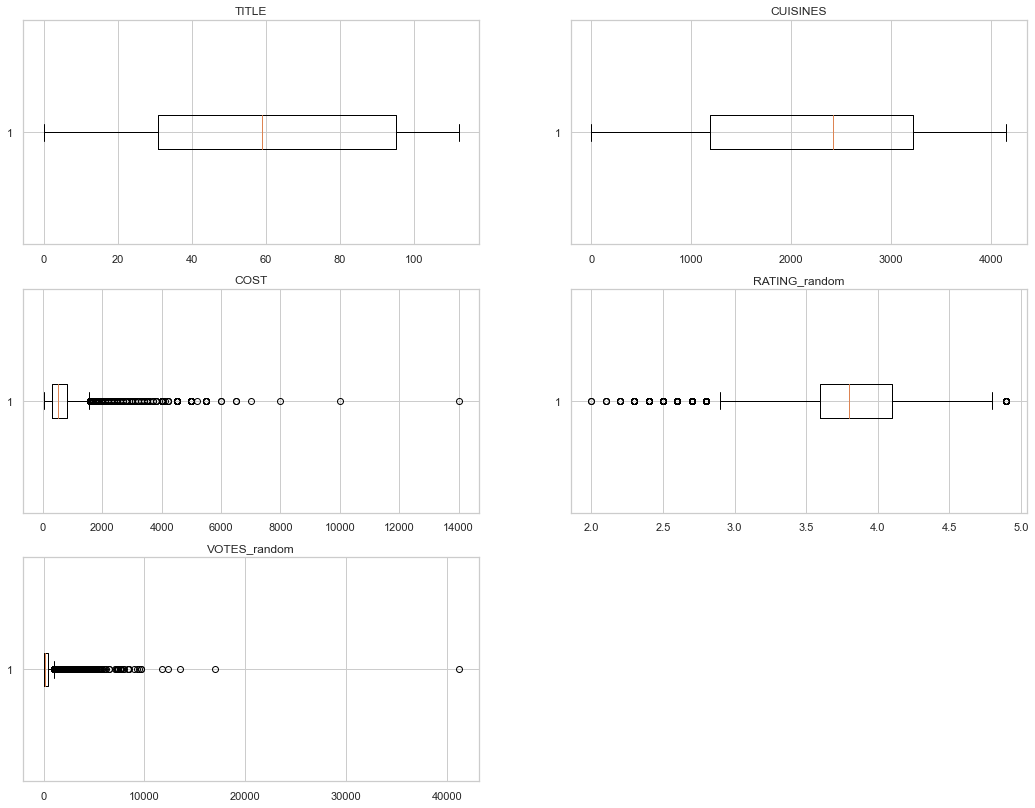

In [150]:
plt.figure(figsize=(18,14))

for i in range(len(ds.columns)):
        plt.subplot(3,2,i+1)
        plt.boxplot(ds[ds.columns[i]], vert=False)
        plt.title(ds.columns[i])
plt.show()

In [151]:
from scipy.stats import zscore
z_score=abs(zscore(ds))
print(ds.shape)
ds_final=ds.loc[(z_score<3).all(axis=1)]
print(ds_final.shape)

(12690, 5)
(12194, 5)


In [152]:
ds=ds_final
print(ds.shape)

(12194, 5)


# Handling skewness

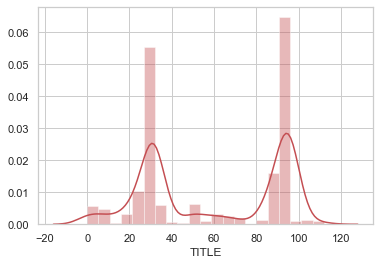

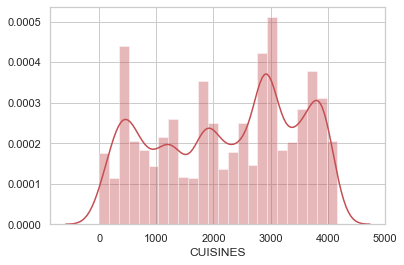

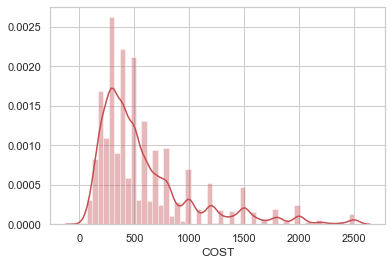

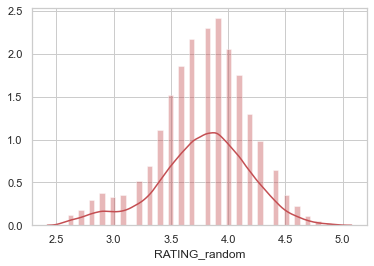

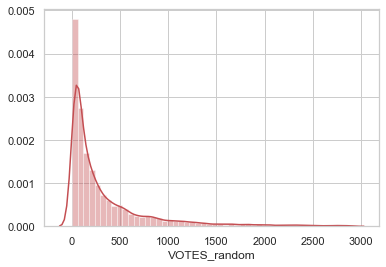

In [153]:
for col in ds.describe().columns:
    sns.distplot(ds[col],color='r')
    plt.show()

In [154]:
ds.skew()

TITLE           -0.082615
CUISINES        -0.215342
COST             1.814811
RATING_random   -0.411108
VOTES_random     2.512733
dtype: float64

In [155]:
for col in ds.columns:
    if ds.skew().loc[col]>0.55:
        ds[col]=np.log1p(ds[col])

In [156]:
ds.skew()

TITLE           -0.082615
CUISINES        -0.215342
COST             0.185626
RATING_random   -0.411108
VOTES_random    -0.100898
dtype: float64

In [158]:
ds.isnull().sum()

TITLE            0
CUISINES         0
COST             0
RATING_random    0
VOTES_random     0
dtype: int64

# Model Training

In [159]:
x=ds.drop(columns=['COST'],axis=1)

In [160]:
y=ds['COST']

In [161]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(12194, 4) 		 (12194,)


In [162]:
#scaling input variables

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [163]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 22 is 0.3058704818711473


In [164]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=22)

In [165]:
#Importing all model library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing error metrics
from sklearn.model_selection import GridSearchCV,cross_val_score

In [166]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('********************************************************************************************')
    print('\n')

score of LinearRegression() is: 0.2683667340734356
Error:
Mean absolute error: 0.4335499958122449
Mean squared error: 0.32279740628854364
Root Mean Squared Error: 0.5681526258748996
r2_score: 0.2901430190607599
********************************************************************************************


score of DecisionTreeRegressor() is: 0.9981294356129015
Error:
Mean absolute error: 0.42491364440627594
Mean squared error: 0.31315146848264624
Root Mean Squared Error: 0.5595993821321162
r2_score: 0.3113551978324237
********************************************************************************************


score of KNeighborsRegressor() is: 0.6060191017529857
Error:
Mean absolute error: 0.3812394597598625
Mean squared error: 0.25289190271815876
Root Mean Squared Error: 0.5028835876404785
r2_score: 0.44387074037693897
********************************************************************************************


score of SVR() is: 0.40612238157206415
Error:
Mean absolute error: 0.378

In [167]:
#Cross validating all algorithms by using for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print("Mean score:",score.mean())
    print("Standard deviation:",score.std())
    print('****************************************************************************************************************************************************')
    print('\n')

Model: LinearRegression()
Score: [0.2750856  0.26929674 0.25431203 0.29868119 0.26778644 0.30272113
 0.25757081 0.24406508 0.26825522 0.30189694]
Mean score: 0.27396711702768817
Standard deviation: 0.019649011971325427
****************************************************************************************************************************************************


Model: DecisionTreeRegressor()
Score: [0.35966288 0.32850056 0.29132057 0.31664299 0.42116973 0.36519087
 0.36379079 0.30970207 0.35397986 0.35734334]
Mean score: 0.3467303644975248
Standard deviation: 0.03490619467660457
****************************************************************************************************************************************************


Model: KNeighborsRegressor()
Score: [0.43097992 0.38626706 0.34400476 0.4172495  0.40951881 0.44048714
 0.39171864 0.40528179 0.46543138 0.45931121]
Mean score: 0.4150250197584522
Standard deviation: 0.03456765495737788
*************************************

## RandomForestRegressor is giving us better score so we will choose it as our final model

In [168]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFC=RandomForestRegressor()

clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 15, 'n_estimators': 500}


In [169]:
#using RandomForestRegressor with its best parameters

rf=RandomForestRegressor(n_estimators=500,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=15)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')

Score: 0.7856158956748154


Mean absolute error: 0.3072707421893241
Mean squared error: 0.16006402189452967
Root Mean Squared error: 0.4000800193642888


r2_score: 0.6480065789702232




In [170]:
#Cross validating

score=cross_val_score(rf,x,y,cv=5,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.64250118 0.63311604 0.66252429 0.64562468 0.66946297]
Mean Score: 0.6506458330461868
Standard deviation: 0.013371784246104322


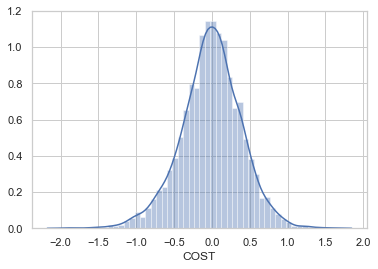

In [171]:
#plotting the distribution plot and we find the Gaussian plot

sns.distplot(y_test-y_pred)
plt.show()

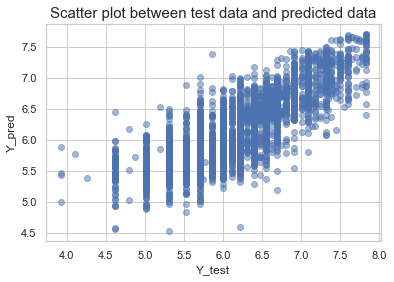

In [172]:
#Scatter plot between test data and prediction

plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

In [173]:
#saving our model

import joblib
joblib.dump(rf,'rf_RestaurantFoodCost.csv')

['rf_RestaurantFoodCost.csv']

In [174]:
model=joblib.load('rf_RestaurantFoodCost.csv')

In [175]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[5.69690544 6.42695696 6.52902764 6.14326421 5.3136345  5.7694602
 7.10194802 5.20545444 6.60718932 6.6586694  6.46349458 6.24905701
 5.8372678  5.83008557 5.7719943  5.94710734 5.47293011 6.3250586
 6.08628331 5.89539175 7.10629907 6.33396714 6.06387196 5.92503903
 6.44034905 5.61285812 5.87435024 7.46072475 4.97019971 6.96600315
 5.84540135 6.68154731 6.31217905 6.8001542  6.39842466 7.29768103
 5.87301821 6.3811901  6.07988762 5.42547679 5.60529418 6.8064333
 5.77792791 5.29744079 6.49061048 6.56872478 6.61457838 6.07470171
 5.51266638 5.72720427 5.83722414 5.71196439 6.53027802 5.77351207
 5.79029889 5.87996594 7.26393884 5.95585457 5.70904573 5.64658291
 6.0511583  5.67001251 6.19345285 5.3947667  5.90273096 5.77708923
 5.70221166 6.83621817 7.05655426 6.42368708 5.71773901 6.24251623
 6.70071544 6.99806448 6.12438864 6.66965884 7.23432836 5.7957522
 5.4756383  6.88027647 6.87781622 5.84596286 6.42634039 6.80980241
 7.5943403  6.14422269 5.61074756 5.61152191 5.93616687 6.73032705

# Now we load our test dataset

In [176]:
df=pd.read_excel("Data_Test.xlsx")
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


## doing all the changes as we did on our training dataset

In [177]:
df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [178]:
df['RATING'].value_counts()

3.8    414
3.9    405
4.0    399
3.7    351
3.6    310
4.1    281
4.2    245
NEW    223
3.5    217
3.4    202
4.3    184
-      177
4.4    122
3.3    120
3.2     83
3.1     77
4.5     75
3.0     59
2.9     56
2.8     45
4.6     43
2.7     40
2.6     24
4.7     21
4.8     17
2.5     16
2.4      9
4.9      6
2.3      5
2.2      2
2.1      1
Name: RATING, dtype: int64

In [179]:
imputer=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')

list1=['CITY','LOCALITY']
for val in list1:
    df[val]=imputer.fit_transform(df[val].values.reshape(-1,1))

In [180]:
df.replace({'RATING':{'NEW':np.nan}},regex=False,inplace=True)

In [181]:
df.replace({'RATING':{'-':np.nan}},regex=False,inplace=True)

In [182]:
df = df.assign(VOTES = lambda x: x['VOTES'].str.extract('(\d+)'))

In [183]:
data_types_dict = {'RATING':float, 'VOTES':float}
df = df.astype(data_types_dict)

In [184]:
def impute_nan(ds,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0,replace=True)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [185]:
median=df.RATING.median()

In [186]:
median

3.8

In [187]:
impute_nan(df,"RATING",median)

In [188]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0,replace=True)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [189]:
median1=df.VOTES.median()

In [190]:
median1

166.0

In [191]:
impute_nan(df,"VOTES",median1)

In [192]:
df.drop(['RATING','VOTES','RATING_median','VOTES_median','RESTAURANT_ID'],axis=1,inplace=True)

In [193]:
le=LabelEncoder()

list1=['CITY','LOCALITY','TITLE','CUISINES','TIME']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [194]:
df.drop(['TIME','CITY','LOCALITY'],axis=1,inplace=True)

In [195]:
df.head()

,TITLE,CUISINES,RATING_random,VOTES_random
0,23,1293,4.3,564.0
1,75,1632,4.2,61.0
2,23,1455,3.8,350.0
3,66,208,3.8,1445.0
4,75,1637,3.6,23.0


In [196]:
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(4231, 4)
(4137, 4)


In [197]:
df=df_final
print(df.shape)

(4137, 4)


In [198]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [199]:
ss=StandardScaler()
x1=ss.fit_transform(df)
x1=pd.DataFrame(x1,columns=df.columns)

In [200]:
num= model.predict(x1)
np.set_printoptions(threshold=sys.maxsize)
print(num)

[6.8457629  5.8474104  6.50574796 6.85647697 5.71872056 5.89311688
 6.38075778 6.69771309 6.66984738 6.23423383 5.90582369 5.47977051
 7.02807527 7.46424407 6.7153857  6.49842818 5.71489439 6.83244669
 5.55740692 6.4515997  6.46897726 6.57530501 7.01786991 5.80510458
 5.9834059  5.57697311 6.83928748 6.57255883 6.40795636 6.00845812
 5.57904058 6.57321003 6.5794958  6.05916003 5.48936717 6.80365996
 5.67722936 5.99139033 6.91781058 6.62475373 5.45470635 5.71464314
 6.38625547 6.12216303 5.73113251 5.72805137 5.64717836 7.39193204
 6.16731612 5.5747308  5.70280076 5.49930623 5.96431343 6.96092861
 6.50157442 5.63239774 5.4923148  5.47003391 5.53062165 6.16858502
 6.47394035 6.37511154 6.78203857 6.48863051 6.36880039 5.81341999
 6.80615878 6.90027687 5.65890902 5.77235315 5.82987464 5.56319792
 5.71046622 6.81208252 6.64593395 5.81869069 5.91495968 5.73688641
 6.70645702 6.48759941 6.53096203 6.32656226 6.09918569 5.79534667
 6.74145935 5.81539312 5.75283848 5.82816207 6.78207131 5.6972